## Manual: https://antspy.readthedocs.io/_/downloads/en/stable/pdf/
### Installation and quick intro: https://notebook.community/ANTsX/ANTsPy/tutorials/10minTutorial

In [1]:
import ants
import nibabel as nib
import numpy as np

import shutil, os
import os.path
import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

Directory architecture:

coreg_github/

    |__seg
    |__t1
    |__rcbv
   

In [3]:
path = "/Users/busebuz/Desktop/coreg_github/"
os.chdir(path+ "rcbv/")

#warpedmovout: Moving image warped to space of fixed image. 
#warpedfixout: Fixed image warped to space of moving image. 
#fwdtransforms: Transforms to move from moving to fixed image. 
#invtransforms: Transforms to move from fixed to moving image.

for files in glob.glob("*_RCBV.nii"): 
    fname = files.split("_")
    #print(fname[0])
    t1_path = path + "t1/" + fname[0] + "_T1post.nii"
    rcbv_path = path + "rcbv/" + fname[0] + "_RCBV.nii"
    seg_path = path + "seg/" + fname[0] + "_T1_CE_NEC.nii"
    
    if os.path.isfile(t1_path) and os.path.isfile(seg_path):
        fi = ants.image_read(rcbv_path) #fixed image (reference)
        mi = ants.image_read(t1_path) #moving image
        seg = ants.image_read(seg_path) #also will move to reference domain

        #dictionary containing key/value pairs
        coreg_dict = ants.registration(fixed=fi, moving=mi, type_of_transform = 'Affine') #type of transform 
        warped_moving = coreg_dict['warpedmovout']

        coreg_img = warped_moving.to_nibabel()
        coreg_path = path + fname[0] + "_t1_rcbv_ants.nii.gz"
        nib.save(coreg_img, coreg_path)  

        coreg_roi = ants.apply_transforms(fixed=fi, moving=seg, transformlist=coreg_dict['fwdtransforms'])
        roi = coreg_roi.to_nibabel()
        roi_path = path + fname[0] + "_t1_rcbv_roi_ants.nii.gz"
        nib.save(roi, roi_path)  


/Users/busebuz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



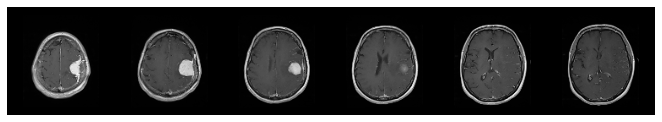

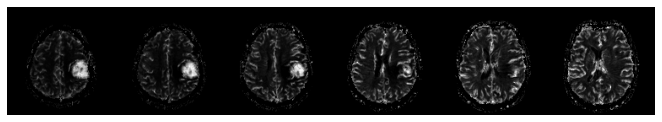

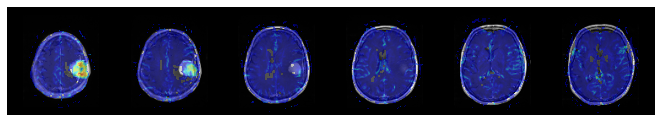

In [7]:
ants.plot(warped_moving, nslices = 6, axis = 2)
ants.plot(fi, nslices = 6, axis = 2)
ants.plot(warped_moving, nslices =6, overlay = fi, overlay_alpha = 0.5, axis = 2)

## Type of transforms:

• “Translation”: Translation transformation.

• “Rigid”: Rigid transformation: Only rotation and translation.

• “Similarity”: Similarity transformation: scaling, rotation and translation

#### • "Affine" (most-used): Affine transformation: Rigid + scaling.
